# IBM HR Analytics Employee Attrition & Performance Data Story Telling

# In this project, we will be focusing on Data on employee attrition data from IBM-HR department
### Attrition is the last thing a company wants to hear from their employees. In a sense, it’s the employees who make the company. It’s the employees who do the work. It’s the employees who shape the company’s culture. Long-term success, a healthy work environment, and high employee retention are all signs of a successful company. But when a company experiences a high rate of employee turnover, then something is going wrong. This can lead the company to huge monetary losses by these innovative and valuable employees.

### Companies that maintain a healthy organization and culture are always a good sign of future prosperity. Recognizing and understanding what factors that were associated with employee attrition rate will allow companies and individuals to limit this from happening and may even increase employee productivity and growth. These predictive insights give managers the opportunity to take corrective steps to build and preserve their successful business.

In [ ]:
### First let's load our necessary libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns
import scipy.stats
import pandas.plotting
from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

import re
import mailbox
import csv

### Load the data

In [40]:
ibm_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


Text(0.5, 1, 'Heatmap of Correlation Matrix')

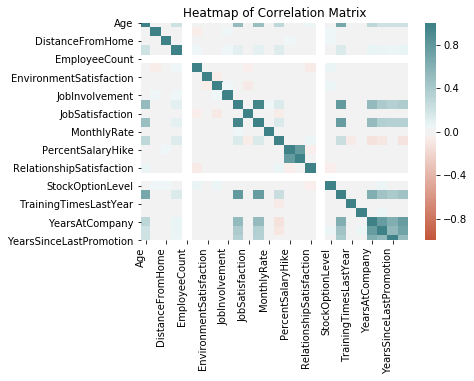

In [67]:
corr = ibm_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 200, n=300),square=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='right');
ax.set_title('Heatmap of Correlation Matrix')

### From the heatmap above, there seems to be heavy positive(+) correlation between JobSatisfaction,and  Age. Which could mean that the employees who spent more years in IBM's Different Departments were highly satisfied with their jobs. But the feature evaluation, when compared independently with the response variable turnover, shows little to no relationship. What does this mean? For the negative(-) relationships, turnover, satisfaction, and salary are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied and are lowly paid.

## Our focus in this exercise will be to visualize the attrition counts and proportions by using bar , pie, histogram, and scatter plots.

### We will saperate the employees' ages in to groups using the coding below.


In [3]:
ibm_data["AgeGroup"] = pd.cut(ibm_data.Age, [17, 25, 32, 39, 46, 53, 60],
              
                              labels =["17-25", "25-32", "32-39", "39-46", "46-53", "53-60"])

### We will investigate the Gender and Age groups attrition by normalizing into the fractional values.

In [4]:
by_gender = ibm_data.groupby("Gender").Attrition.value_counts(normalize = True)
by_age = ibm_data.groupby((["AgeGroup", "Gender"])).Attrition.value_counts(normalize = True)

In [5]:
by_gender

Gender  Attrition
Female  No           0.852041
        Yes          0.147959
Male    No           0.829932
        Yes          0.170068
Name: Attrition, dtype: float64

### The oldest employee in this company is 60 years old and the youngest employee in th same company is 18 years old.

In [6]:
ibm_data.Age.max(), ibm_data.Age.min()

(60, 18)

In [7]:
by_age

AgeGroup  Gender  Attrition
17-25     Female  No           0.581395
                  Yes          0.418605
          Male    No           0.675000
                  Yes          0.325000
25-32     Female  No           0.785714
                  Yes          0.214286
          Male    No           0.782427
                  Yes          0.217573
32-39     Female  No           0.902299
                  Yes          0.097701
          Male    No           0.868217
                  Yes          0.131783
39-46     Female  No           0.900901
                  Yes          0.099099
          Male    No           0.906433
                  Yes          0.093567
46-53     Female  No           0.924242
                  Yes          0.075758
          Male    No           0.839080
                  Yes          0.160920
53-60     Female  No           0.925000
                  Yes          0.075000
          Male    No           0.829787
                  Yes          0.170213
Name: Attrit

## What is the Attriotion rate and Gender rate in this company?
#### In order for us to investigate these two questions, we wil work with bar and pie plots.

### On the left graph below, we can see that there is a very low rate of employees with attrition. 

### On the right graph below, we can notice that there is more male employees than female employees working in this company based on the data.


Text(0.5, 1.0, 'Gender')

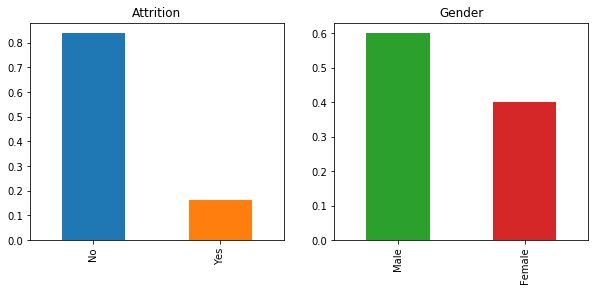

In [8]:
pp.figure(figsize = (10, 4))
pp.subplot(1,2,1); ibm_data.Attrition.value_counts(normalize = True).plot(kind="bar", color = ["C0", "C1"]); pp.title("Attrition")
pp.subplot(1,2,2); ibm_data.Gender.value_counts(normalize = True).plot(kind="bar", color = ["C2", "C3"]); pp.title("Gender")


## Same graphs with horizontal versions

Text(0.5, 1.0, 'Gender')

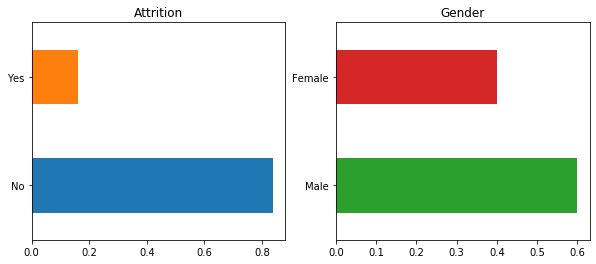

In [9]:
pp.figure(figsize = (10, 4))
pp.subplot(1,2,1); ibm_data.Attrition.value_counts(normalize = True).plot(kind="barh", color = ["C0", "C1"]); pp.title("Attrition")
pp.subplot(1,2,2); ibm_data.Gender.value_counts(normalize = True).plot(kind="barh", color = ["C2", "C3"]); pp.title("Gender")


## Pie charts with percents 

### Here, we can see the details of the same visualizations above in pie plots. 
### Pie charts will help us to see the proportional visualization of attrition graphs and gender graph for this company
### What we are noticing is that employees in this company has a 16.1% attrition rate bsaed on the data.
### We can also say that there 60% of the employees are male and 40% is female.

Text(0.5, 1.0, 'Gender')

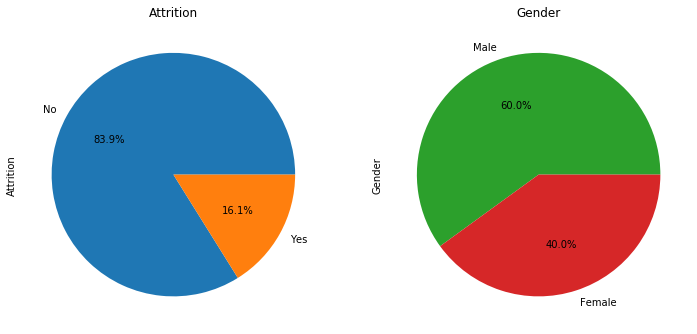

In [10]:
pp.figure(figsize = (10, 4))
pp.subplot(1,2,1); ibm_data.Attrition.value_counts(normalize = True).plot(kind="pie", colors = ["C0", "C1"], autopct='%1.1f%%', figsize = (10,8)); pp.title("Attrition")
pp.subplot(1,2,2); ibm_data.Gender.value_counts(normalize = True).plot(kind="pie", colors = ["C2", "C3"], autopct='%1.1f%%', figsize = (12,8)); pp.title("Gender")


## How is the attrtion rate based upon gender.

### With the bar graphs below, what we can conclude is that male attrition rate is slightly more than female attrition rate.
### We are also noticing that  there is less female employees with attrition compared to male employees
### Lastly, attrition is always a lower percent in each gender categories.

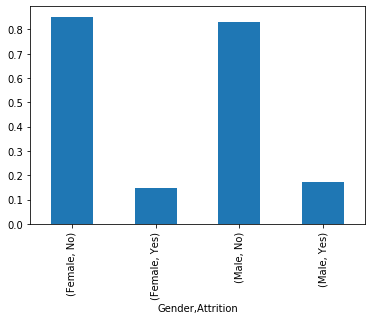

In [11]:
by_gender.plot(kind = "bar")

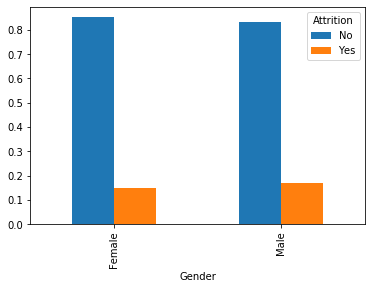

In [12]:
by_gender.unstack().plot(kind = "bar")

### In this graph below, we are noticing that male employees has bigger attrion than female employees

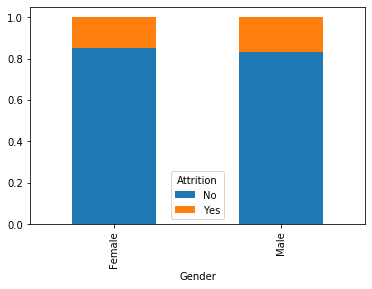

In [13]:
by_gender.unstack().plot(kind = "bar", stacked = True)


## How is the attriton rate comparision of genders with respact to age groups?  
### In both male and female, attrition happens when employees are younger. 
### One interesting thing is that after the age of 32, male attriton rate is getting higher than the female attrition rate.

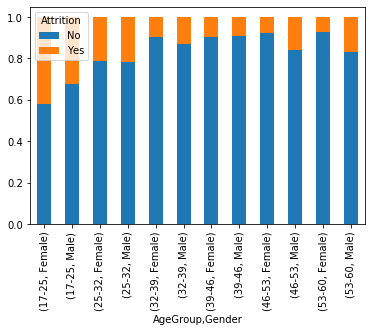

In [14]:
by_age.unstack().plot(kind = "bar", stacked = True)

In [15]:
by_age.unstack().drop("No", axis = 1).unstack()

Attrition       Yes          
Gender       Female      Male
AgeGroup                     
17-25      0.418605  0.325000
25-32      0.214286  0.217573
32-39      0.097701  0.131783
39-46      0.099099  0.093567
46-53      0.075758  0.160920
53-60      0.075000  0.170213

In [16]:
by_age2 = by_age.unstack().drop("No", axis = 1).unstack()

by_age2.columns = ["Female-Yes", "Male-Yes"]
by_age2.columns.name = "Gender-Attrition"

In [17]:
by_age2

Gender-Attrition,Female-Yes,Male-Yes
AgeGroup,,
17-25,0.418605,0.325000
25-32,0.214286,0.217573
32-39,0.097701,0.131783
39-46,0.099099,0.093567
46-53,0.075758,0.160920
53-60,0.075000,0.170213


## In both male and femal, attrition happens when employees are younger.
### Also male employees has higher attrition rate in the older ages than female employees. however the opposite of this situation happens to be in the younger ages. Meaning, female attrition rate is more than male attrtion rate.

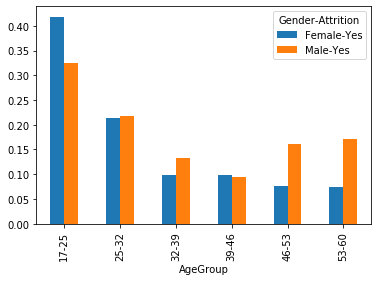

In [18]:
by_age2.plot(kind = "bar")

## How many employees in each department?

In [19]:
Dept_df = ibm_data.groupby("Department").size()
Dept_df.head()

Department
Human Resources            63
Research & Development    961
Sales                     446
dtype: int64

## What are the trends you can end up with when you investigate the comparision of attrtion rate in each department with respect to age groups?

### We will look into attrition rate in each department based upon the AgeGroup that was created before and visualize what dept has the highest attrition rate in each AgeGroup.
### We can see that the the highest attriton rate is in younger ages and this is in Human resources dept. The rate decreases as the age of the employees gets older. By tthe end of the age groups, one of the intersting thing that we are facing is that there is no employees in Human Resources Dept. after the AgeGroup of 39 t0 46. As the employees' ages get older to middle class age around 32 to 46, Human resources dept decreases the attrtion rate. However there is an increasing trend Research&Development Department after the AgeGroup of 39 to 46. 
### We can state that even thought he Reasearch&Development Dept has a high attrition range in the younger ages, this rate would decrease in the older age groups. later after the age ropu of 32 to 39 this attrtion rate trend would increase back up steadily.
### When we look at the Sales Dept, they have the highest attrtion rate among the other departments between the ages of 39 to 53. This tells us that Sales dept has a change in the attrition rate from decrease to increase after the age of 39. Close to senior years of age, this trend turns back to decrease and we can see that in the last age group for Sales Dept.


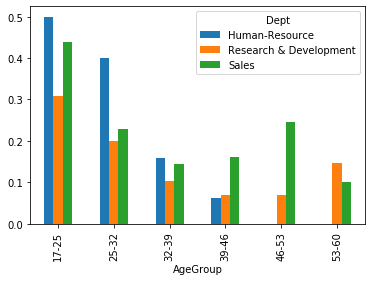

In [20]:
by_dept = ibm_data.groupby((["AgeGroup", "Department"])).Attrition.value_counts(normalize = True)

by_dept2 = by_dept.unstack().drop("No", axis = 1).unstack()

by_dept2.columns = ["Human-Resource", "Research & Development", "Sales"]

by_dept2.columns.name = "Dept"
by_dept2.plot(kind = "bar")


## How old is the highest number of employee in this company?

### The histogram plot is visualizing the number of employees by ages from 18 to 60 years old with 30 saperate bins. It is clear to say that this company has the highest number of employees around the age of 35.

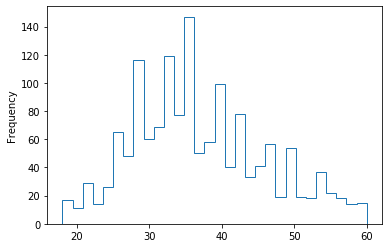

In [21]:

ibm_data.Age.plot(kind= "hist", histtype = "step", bins = 30)


## What is the correlation between <font color='red'>YearsAtCompany</font> vs. <font color='red'>MonthlyIncome</font> based on <font color='red'>TrainingTimesLastYear</font> variable?

### In order for us to investigate this question wee needd to create a function that would use a scatter plot to find out the relation between YearsAtCompany and MonthlyIncome based on TrainingTimesLastYear.

In [22]:
def plotrole(TrainingTimesLastYear):
    data = ibm_data[ibm_data.TrainingTimesLastYear == TrainingTimesLastYear]
    
                                      
    
    data.plot.scatter('YearsAtCompany', "MonthlyIncome", edgecolors = "k",
                     linewidths = 1, figsize = (10, 6.5))

### We also need to find out the <ins>TrainingTimesLastYear range</ins> to change the TrainingTimesLastYear on our interactive scatter plot. 
### I found out that the TrainingTimesLastYear changes between 0 to 6 inclusive.

In [23]:
print(ibm_data.TrainingTimesLastYear.max())
print(ibm_data.TrainingTimesLastYear.min())

6
0


### Please change the <ins>TrainingTimesLastYear dropdown-menu</ins> to see the correlation between the YearsAtCompany vs. MonthlyIncome.

In [24]:
interact(plotrole, TrainingTimesLastYear = range(0,7,1))

interactive(children=(Dropdown(description='TrainingTimesLastYear', options=(0, 1, 2, 3, 4, 5, 6), value=0), O…

<function __main__.plotrole(TrainingTimesLastYear)>